In [1]:
from utils import pipeline, plot_learning_curve, plot_confusion_matrix

In [2]:
CONFIG = dict(
    model="RNN",                     # 4 options: "RNN", "LSTM", "GRU", "BiLSTM"
    dataset="NER",                   # 2 options: "NER", "ATE"
    embedding="Word2Vec",            # 3 options: "Word2Vec", "GloVe", "FastText"       => 4*3*2 = 24 models
    batch_size=128,
    epochs=30,
    lr=1e-2,
    criterion="NLLLoss",
    optimizer="Adam",
    hyperparams=dict(
        input_size=300,
        hidden_size=128,
        num_layers=2
    ),
    early_stopping_patience=1,
    device="cpu",
    verbose=True
)

In [3]:
# KEYS: "model", "encoder", "train_loader", "test_loader", "val_loader", "accuracy", "precision", "recall", "f1", "cf", and "loss"
run = pipeline(CONFIG)

Loading Word Embeddings...
Preprocessing Data...


 30%|████▌          | 9/30 [01:36<03:44, 10.68s/it, [Train: Loss: 0.12746, F1-Score: 0.48872], [Validation: Loss: 0.12746, F1-Score: 0.43151]]



Early Stopping at Epoch 9.


c:\Users\Divyajeet Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.16056
Accuracy: 0.95616, Precision: 0.52967, Recall: 0.43188, F1-Score: 0.44849


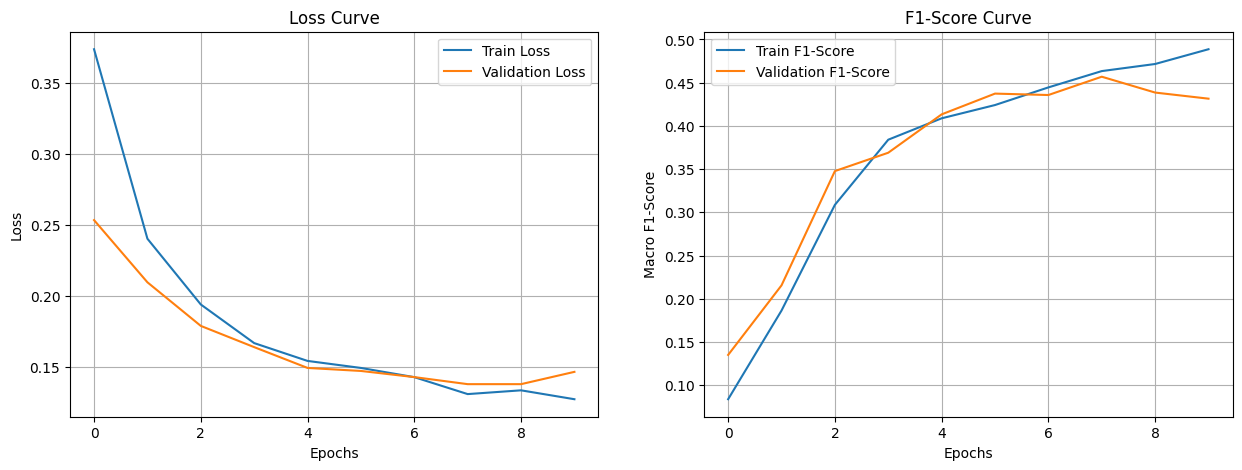

In [4]:
plot_learning_curve(run["model"])

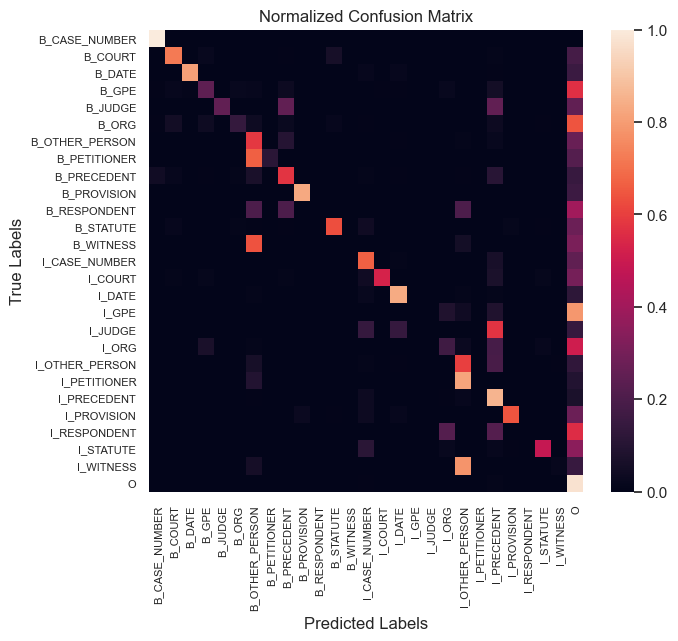

In [5]:
plot_confusion_matrix(run["cf"], labels=run["encoder"].classes_)